### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import calendar


### Upload Dataset with pd.read_csv and to see data use data.head

In [3]:
data = pd.read_csv('Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Check missing values 
##### use data.isnull() or you can use data.isna() it will return True and False True mean data is missing and 
##### if data is not available python use NaN to represent it.
##### we use two functions first to check missing values and second to count how many missing data points do we have? 


In [5]:
data.isnull().sum()
# you can write .na as well.

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
#  we can use data.isnull().any
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [8]:
#  we can check how many rwos and coulmns do we have ?
data.shape

(1156, 7)

In [13]:
# we will drop all missing values but drop missing value shouwl be our last option,we can deal with missing values.
data =data.dropna()

In [15]:
data.isnull().sum()

# we removed all missing values.now there is no missing value.

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [17]:
# to check data types 
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [23]:
# we need to conver Start_Date column from object to datetime because date is not object.
# we use pd.to_datetime(data['column name]', format = %m/%d/%Y %H:%M) Month/Day/Year Hour: Minute.

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [24]:
# check data type
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [27]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEK DAY'] = weekday    

In [28]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEK DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### Categories we have 

In [29]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

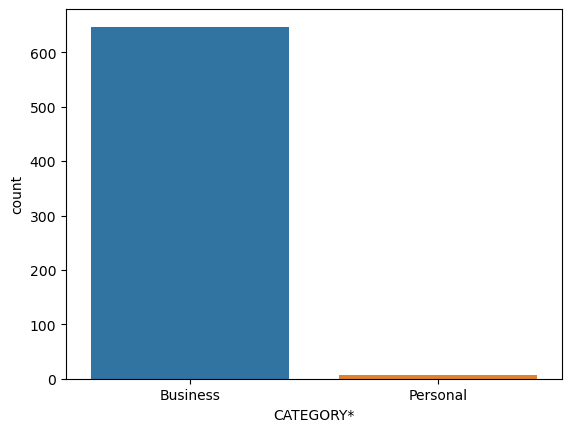

In [30]:
sns.countplot(x = 'CATEGORY*',data = data)

### How long do people travling with Uber

<AxesSubplot:ylabel='Frequency'>

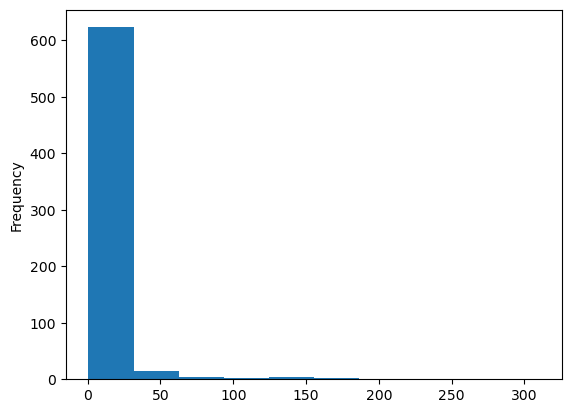

In [32]:
data['MILES*'].plot.hist()

### What hour do most people take Uber to teir destination?

Text(0.5, 1.0, 'Nomber Of Rides vs Hours')

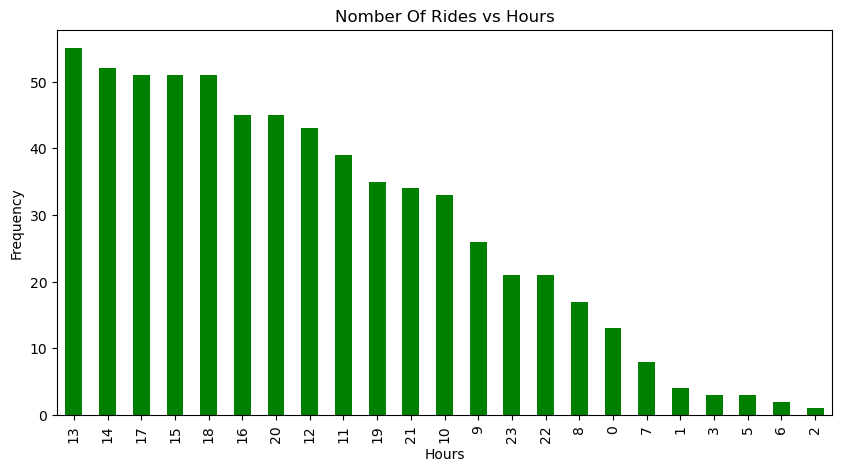

In [33]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind= 'bar',color = 'green',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Nomber Of Rides vs Hours')

### Check the purpose of trips

<AxesSubplot:>

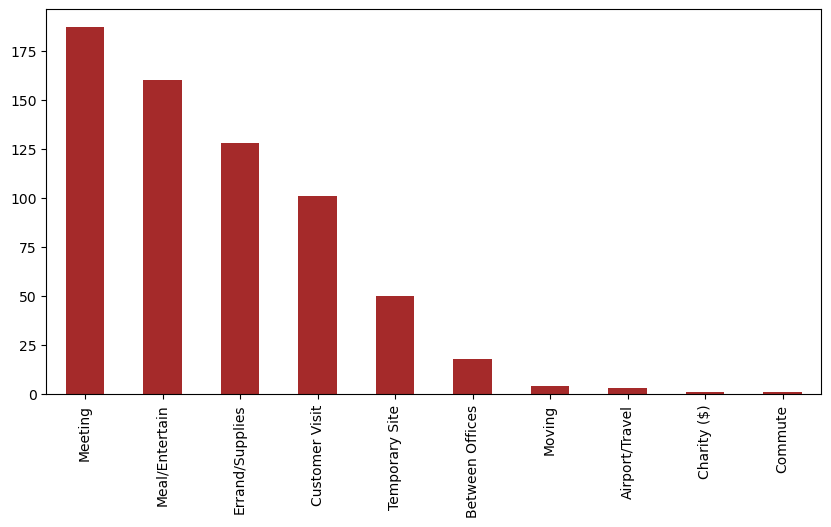

In [35]:
data['PURPOSE*'].value_counts().plot(kind= 'bar',color='brown',figsize=(10,5))


### Which day has highest number of trips

<AxesSubplot:>

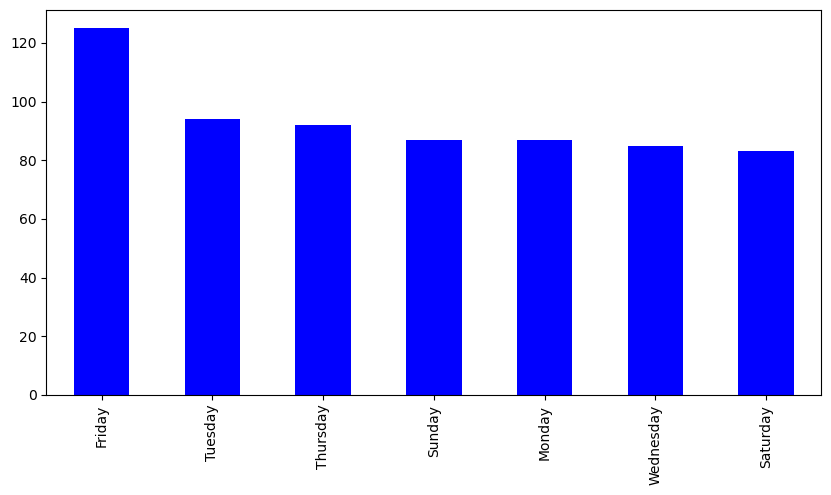

In [39]:
data['WEEK DAY'].value_counts().plot(kind='bar',color= 'blue',figsize=(10,5))

### What are the number of trips for each day

<AxesSubplot:>

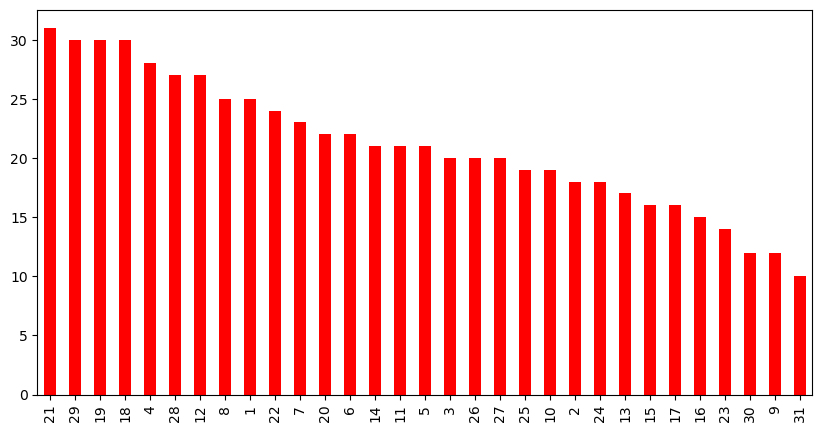

In [44]:
data['DAY'].value_counts().plot(kind='bar',color= 'red',figsize=(10,5))

### What are the trips in the month

<AxesSubplot:>

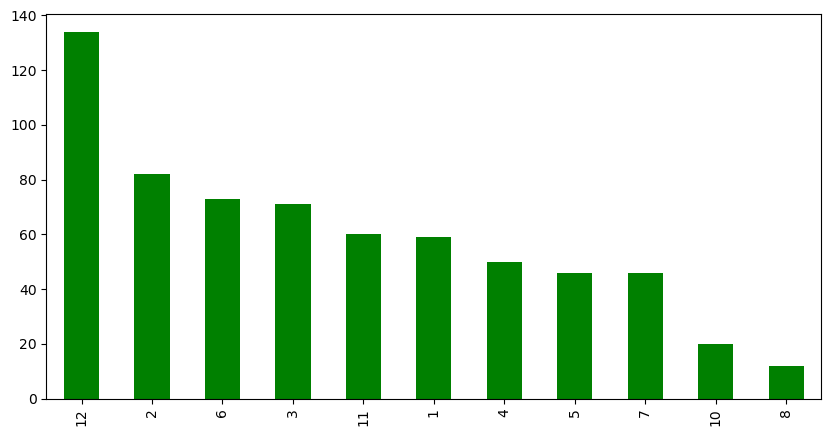

In [43]:
data['MONTH'].value_counts().plot(kind='bar',color= 'green',figsize=(10,5))

### The Starting point of trips,Where do people start boarding teiar trip from most

<AxesSubplot:>

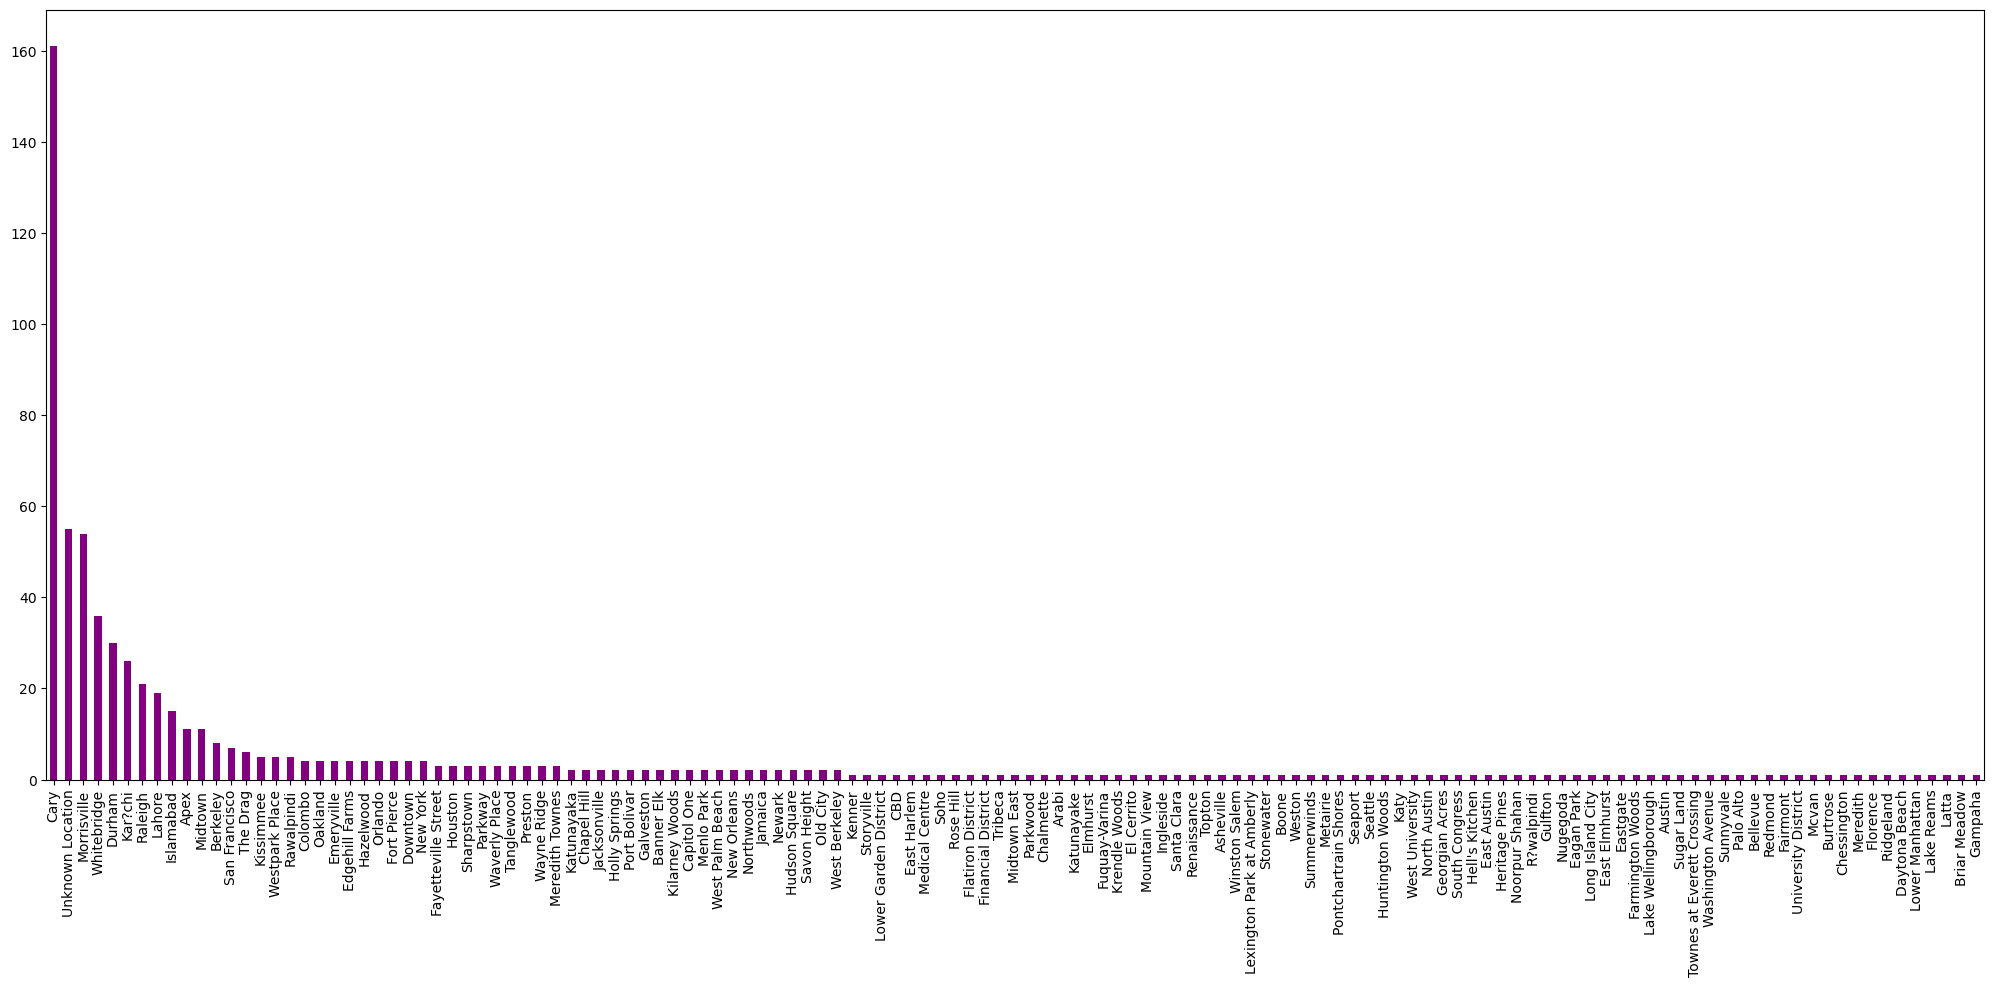

In [63]:
data['START*'].value_counts().plot(kind='bar',color= 'purple',figsize=(25,10))